In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, encoding='latin')
df.columns = ['label', 'id', 'date', 'query', 'user', 'tweet']

# Data reduction
df = df.drop(['id', 'date', 'query', 'user'], axis=1)

In [3]:
labels_dict = {0:'Negative', 2:'Neutral', 4:'Positive'}

def convert_labels(label):
    return labels_dict[label]

df.label = df.label.apply(lambda x: convert_labels(x))
df

,label,tweet
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
172,Positive,@BennyGreenberg hav a grt day
173,Positive,"@andyiomoon Out of the gutter, now."
174,Positive,@vanakoestoer BC team wanna convoy? coz me and...
175,Positive,"@Bronnee Ah righto, we'll be down the road a b..."


Text(0.5, 1.0, 'Data Distribution')

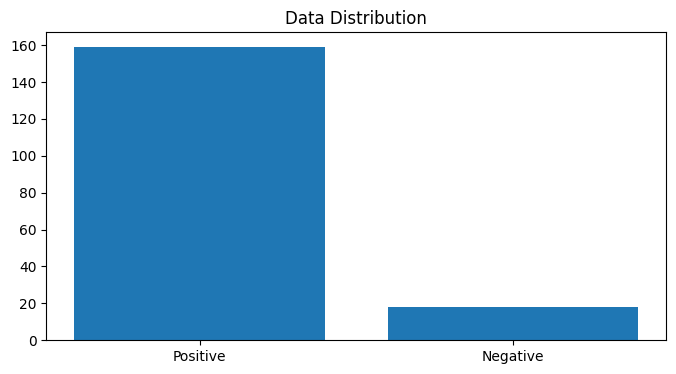

In [4]:
instances = df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(instances.index, instances.values)
plt.title("Data Distribution")

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

punctuations_and_dummies = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"



def preprocess(tweet, will_be_stemmed=False):
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        return " ".join(tokens)
    
df.tweet = df.tweet.apply(lambda tw: preprocess(tw))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [6]:
# Remove 0 length tweets
df = df[df.iloc[:,1].astype(str).str.len()!=0]

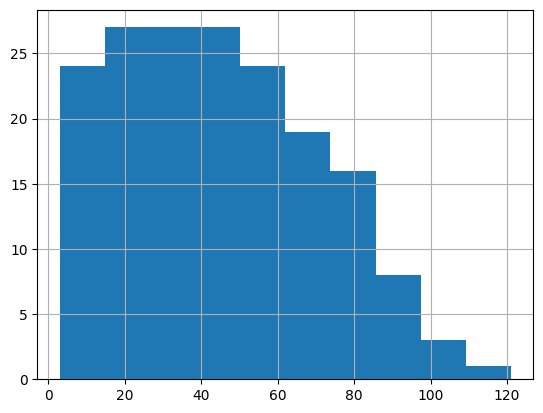

count    176.000000
mean      44.846591
std       25.993060
min        3.000000
25%       23.750000
50%       43.000000
75%       63.250000
max      121.000000
dtype: float64

In [7]:
tweets_len = [len(x) for x in df['tweet']]
pd.Series(tweets_len).hist()
plt.show()
pd.Series(tweets_len).describe()

In [8]:
all_str = ""
for i in df.tweet:
    all_str += i

In [9]:
from collections import Counter

letter_list = list(all_str)
my_counter = Counter(letter_list)

letter_df = pd.DataFrame.from_dict(my_counter, orient='index').reset_index()
letter_df = letter_df.rename(columns={'index':'letter', 0:'frequency'})
letter_df = letter_df.loc[letter_df['letter'].isin(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])]
letter_df['all_tweets_relative_freq']=letter_df['frequency']/letter_df['frequency'].sum()
letter_df = letter_df.sort_values('letter')

english = pd.read_csv('letter-frequencies.csv')
english['expected_relative_frequency'] = english['count']/english['count'].sum()
english = english.drop(['count'], axis=1)

letter_df = pd.merge(letter_df, english, on = 'letter')
letter_df['expected'] = np.round(letter_df['expected_relative_frequency']*letter_df['frequency'].sum(),0)
letter_df = letter_df.reset_index().drop(['index'], axis=1)
letter_df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdf in position 2706: invalid continuation byte

In [10]:
letter_df.plot(x="letter", y=["all_tweets_relative_freq", "expected_relative_frequency"], kind="barh", figsize=(12,8))

KeyError: "['expected_relative_frequency'] not in index"

In [ ]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(letter_df[['frequency', 'expected']])
p

KeyError: "['expected'] not in index"

In [11]:
letter_df[['frequency', 'expected']].corr()

KeyError: "['expected'] not in index"

In [12]:
df1 = df.copy()

df1['number_of_characters'] = [len(tw) for tw in df1.tweet]
df1

,label,tweet,number_of_characters
0,Negative,awww bummer shoulda got david carr third day,44
1,Negative,upset update facebook texting might cry result...,69
2,Negative,dived many times ball managed save 50 rest go ...,52
3,Negative,whole body feels itchy like fire,32
4,Negative,behaving mad see,16
...,...,...,...
172,Positive,hav grt day,11
173,Positive,gutter,6
174,Positive,bc team wanna convoy coz kak echie idea depart...,70
175,Positive,ah righto road bit byron clarks something call...,82


In [13]:
df1.number_of_characters.max()

121

In [14]:
df1.number_of_characters.min()

3

In [15]:
df1.number_of_characters.mean()

44.84659090909091

In [16]:
df1.number_of_characters.std()

25.993060387566686

In [17]:
df1['number_of_words'] = [len(tw.split()) for tw in df1.tweet]
df1

,label,tweet,number_of_characters,number_of_words
0,Negative,awww bummer shoulda got david carr third day,44,8
1,Negative,upset update facebook texting might cry result...,69,11
2,Negative,dived many times ball managed save 50 rest go ...,52,10
3,Negative,whole body feels itchy like fire,32,6
4,Negative,behaving mad see,16,3
...,...,...,...,...
172,Positive,hav grt day,11,3
173,Positive,gutter,6,1
174,Positive,bc team wanna convoy coz kak echie idea depart...,70,13
175,Positive,ah righto road bit byron clarks something call...,82,14


In [18]:
df1.number_of_words.max()

22

In [19]:
df1.number_of_words.min()

1

In [20]:
df1.number_of_words.mean()

7.5397727272727275

In [21]:
df1.number_of_words.std()

4.1909573341449535

<BarContainer object of 20 artists>

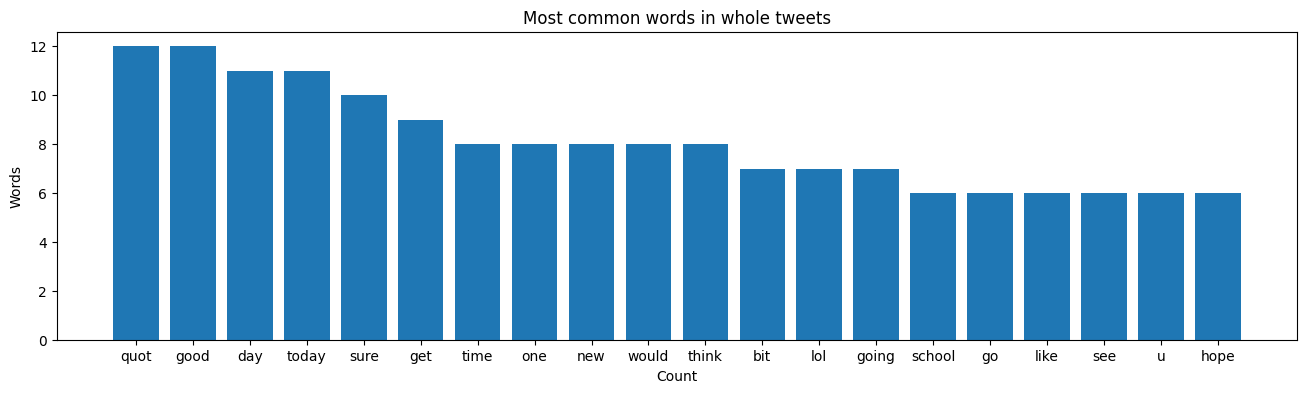

In [88]:
import collections
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

all_tweets = ' '.join(df['tweet'].str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in whole tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

<BarContainer object of 20 artists>

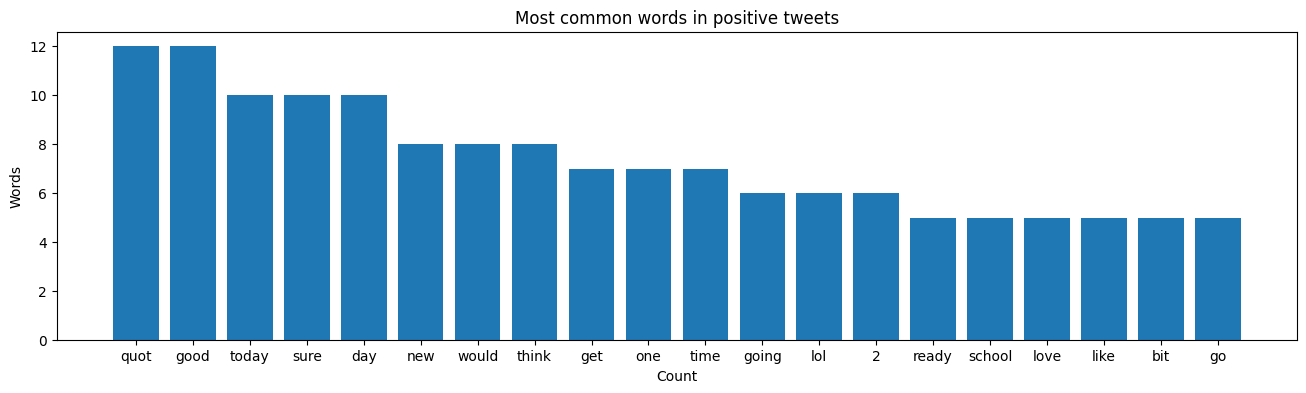

In [89]:
all_tweets = ' '.join(df[df.label == 'Positive'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in positive tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

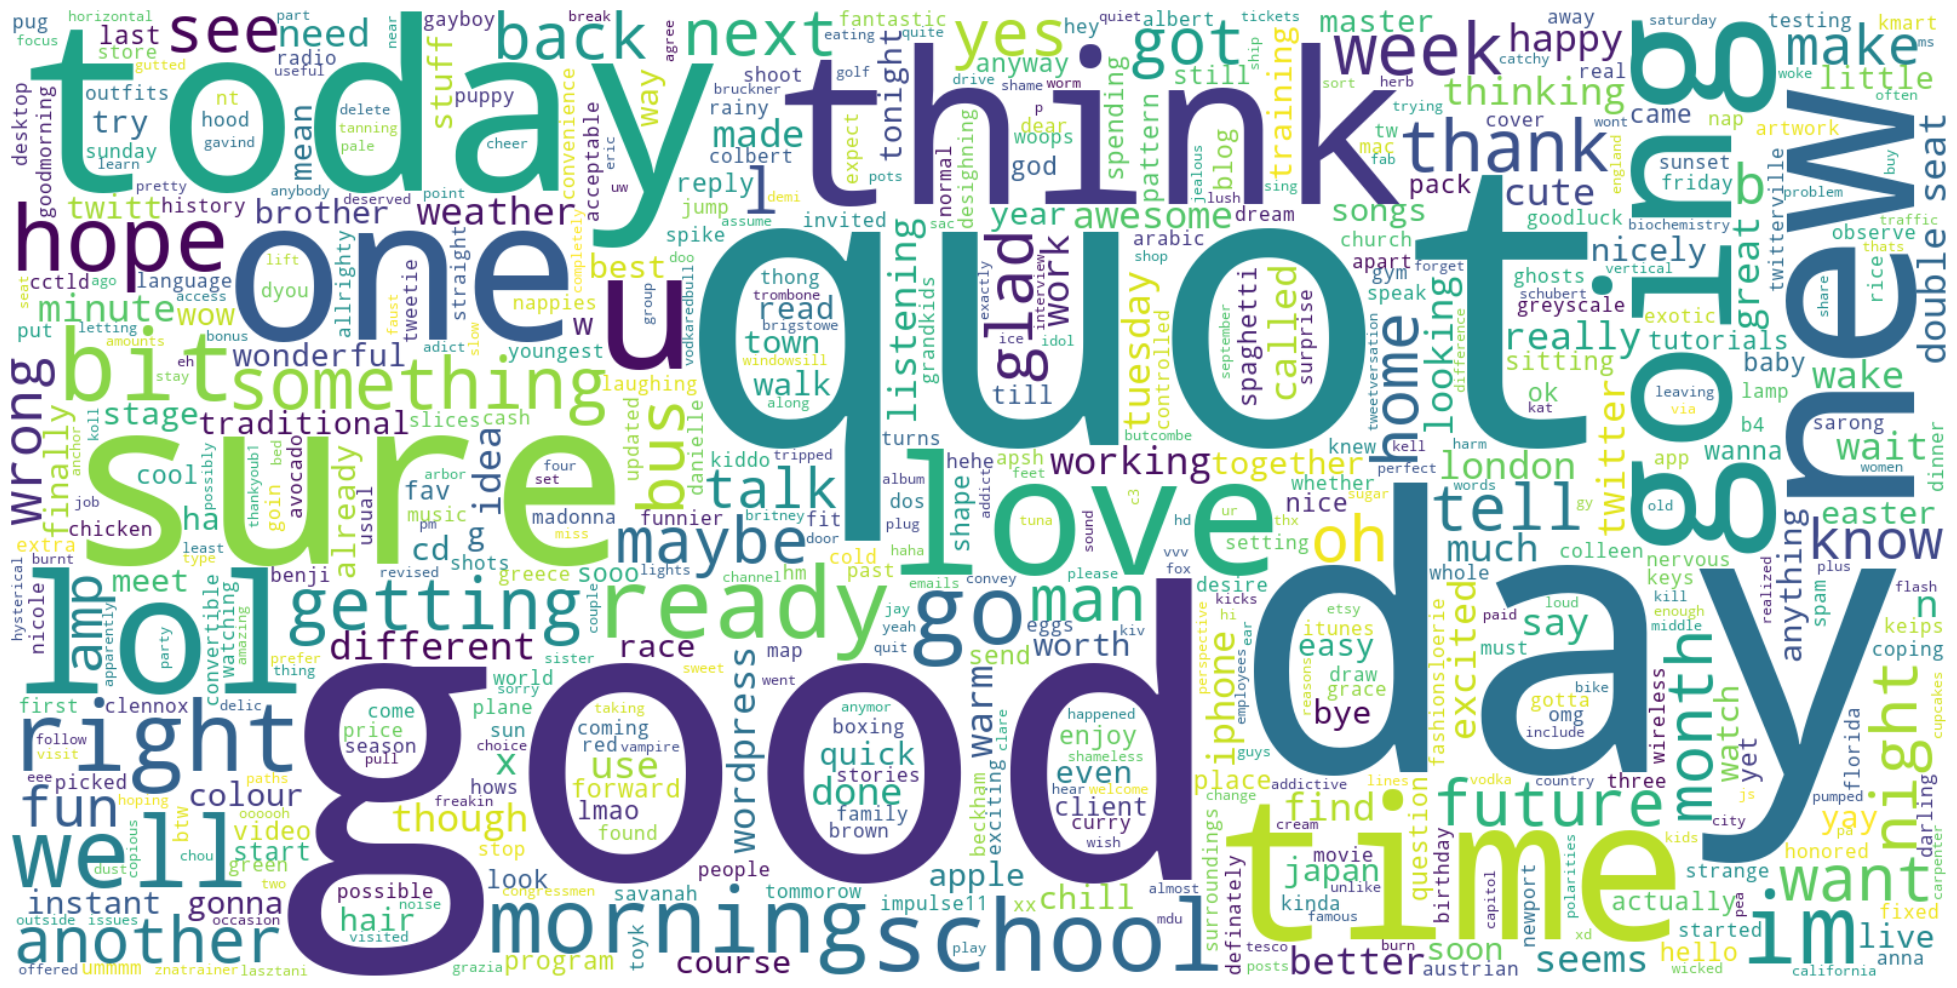

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_fig = WordCloud(max_words = 200,width = 1600,height=800,background_color='white')
plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Positive'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')
plt.show()

<BarContainer object of 20 artists>

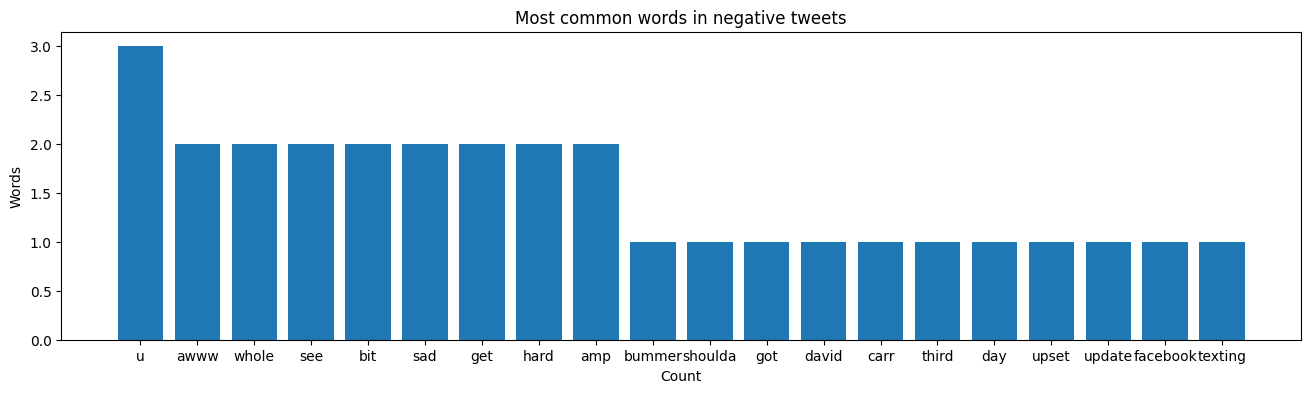

In [90]:
all_tweets = ' '.join(df[df.label == 'Negative'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in negative tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

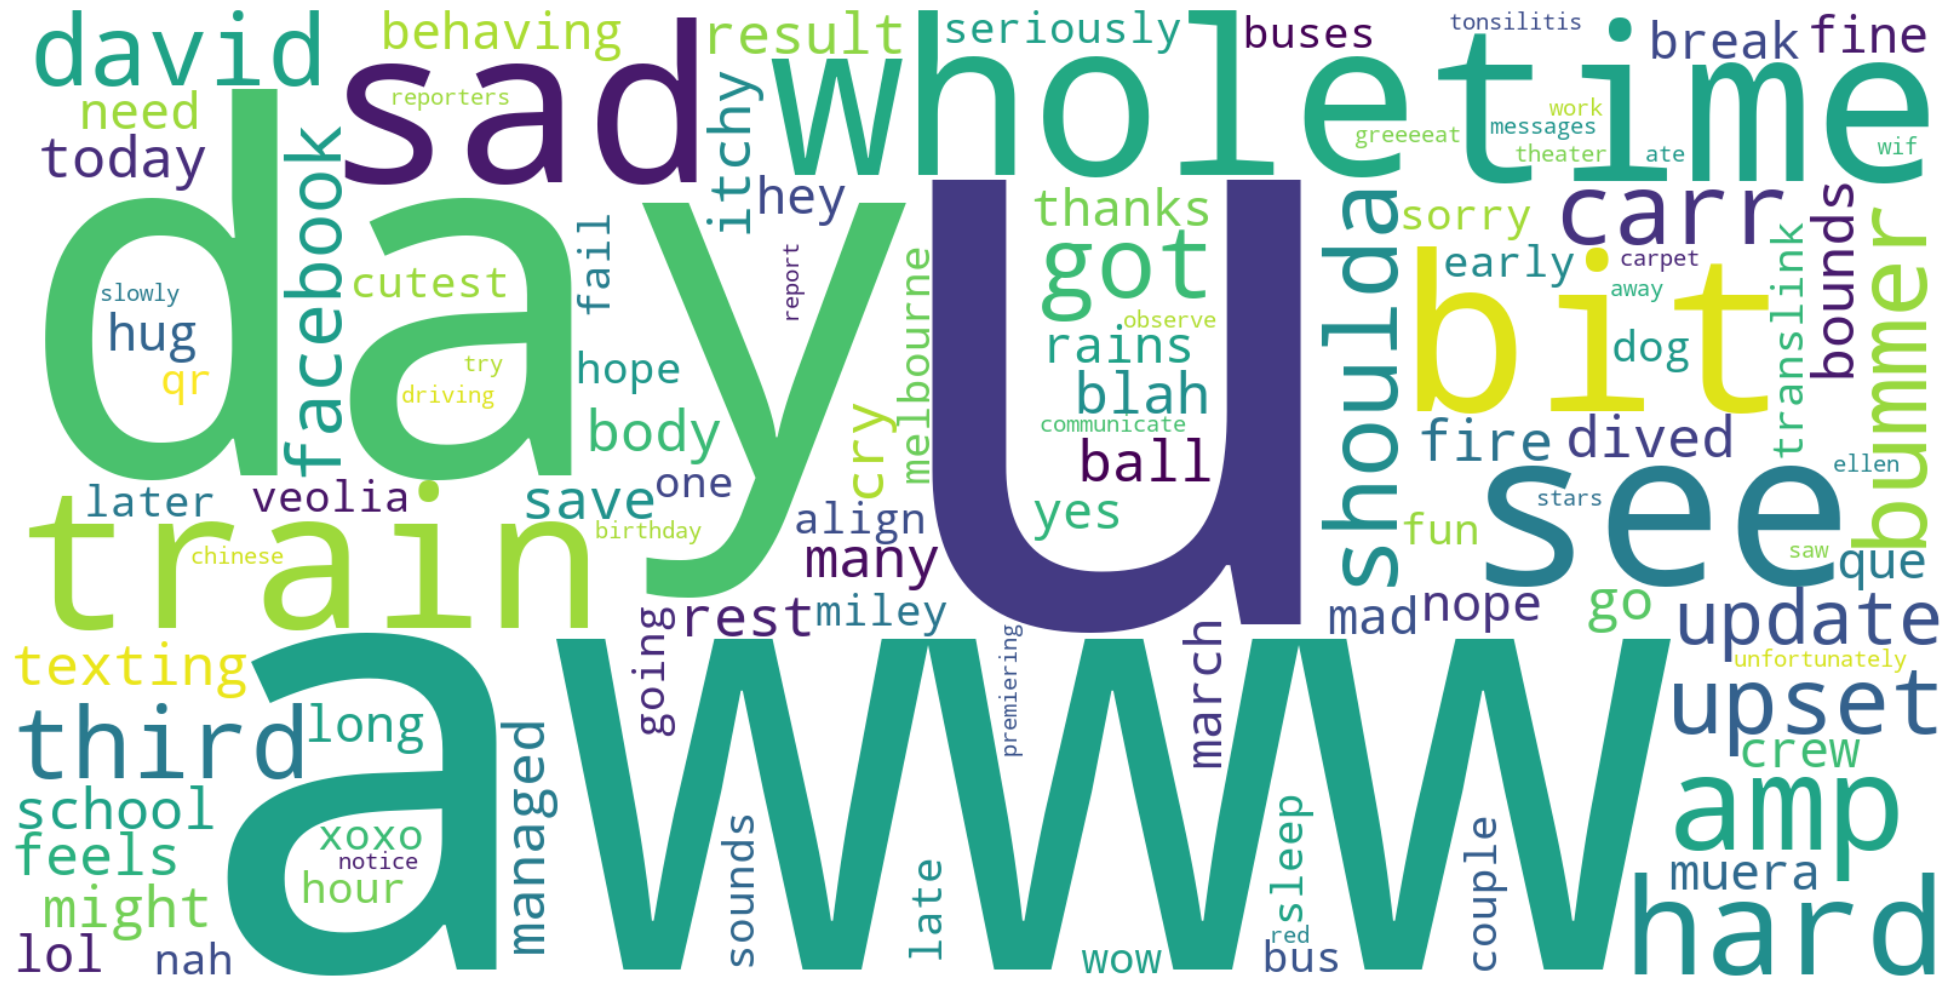

In [29]:
from wordcloud import WordCloud

plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Negative'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

In [30]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=7)
print('Training Data', len(train_data), 'Test Data', len(test_data))

train_data.head(10)

Training Data 140 Test Data 36


,label,tweet
64,Positive,brothers new puppy
11,Negative,awww u seriously cutest dog miley sorry hope u...
96,Positive,sure thing
28,Positive,sure price kinda expect artwork sure extra cas...
95,Positive,hi britney love new album thx follow
75,Positive,called ear worm try listening something else c...
147,Positive,firebug think would ever figured program websi...
105,Positive,idol today sooo pumped get feet cheer loud sin...
38,Positive,love sun setting really watch real sunset obse...
29,Positive,boxing training fun


In [31]:
test_data.head(10)

,label,tweet
164,Positive,sooo tired easter show tomrow fee 10 keke
115,Positive,wish visited london couple years ago completel...
123,Positive,listening wonderful magnificent god moen worki...
97,Positive,old possibly 22
33,Positive,japan hm good im glad go away japan b4 rainy s...
79,Positive,welcome glad share great find
170,Positive,exam weather
133,Positive,iphone maybe osx soon future
126,Positive,tony dead man walking hero weeks back wait die
22,Positive,draw cover make 3 b w greyscale colour see peo...


In [92]:
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

ModuleNotFoundError: No module named 'tensorflow.python'

In [35]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet), maxlen = 30)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet), maxlen = 30)

print("X_train, X_test", X_train.shape, X_test.shape)

labels = train_data.label.unique().tolist()

ModuleNotFoundError: No module named 'tensorflow.python'

In [36]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (140, 1)
y_test shape: (36, 1)


In [37]:
MODELS_PATH = '../models'
EMBEDDING_DIMENSION = 300

In [38]:
import tensorflow as tf

BATCH_SIZE = 1024
EPOCHS = 10
LR = 1e-3

embeddings_index = {}

glove_file = open('../glove/glove.6B.300d.txt', encoding='utf8')
for line in glove_file:
    values = line.split()
    word = value = values[0]
    coefficients = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefficients
glove_file.close()

print('%s word vectors.' % len(embeddings_index))


embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIMENSION))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = tf.keras.layers.Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=30, trainable=False)

ModuleNotFoundError: No module named 'tensorflow.python'

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

K = 20000
shuffled_df = df.sample(frac=1).reset_index(drop=True)
first_K_tweets = shuffled_df['tweet'].head(K)

vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(first_K_tweets)

# Dictionary
vectorizer.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [40]:
# Transform each tweets in vector space
vector = vectorizer.transform(first_K_tweets)
vector_spaces = vector.toarray()

vector_spaces

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
for i, v in zip(first_K_tweets, vector_spaces):
    print(i)
    print(v)

ellen messages get notice sad try hard communicate wif u
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

# Learn vocabulary from tweets 
vectorizer.fit(first_K_tweets)

# Vocabulary
vectorizer.vocabulary_

{'ellen': 226,
 'messages': 447,
 'notice': 483,
 'sad': 590,
 'try': 723,
 'hard': 321,
 'communicate': 149,
 'wif': 786,
 'want': 773,
 'tw': 731,
 'austrian': 49,
 'cctld': 123,
 'sure': 673,
 'miss': 452,
 'california': 110,
 'future': 277,
 'fox': 271,
 'news': 474,
 'anchor': 28,
 'freakin': 272,
 'hysterical': 352,
 'perfect': 513,
 'keys': 381,
 'months': 456,
 'home': 340,
 'quiz': 559,
 'wooo': 795,
 'boxing': 86,
 'training': 717,
 'fun': 275,
 'oh': 491,
 'loved': 422,
 'sang': 594,
 'soo': 640,
 'good': 290,
 'ok': 492,
 'deed': 184,
 'day': 179,
 'send': 610,
 'workout': 801,
 'dvd': 215,
 'lmao': 413,
 'pictures': 517,
 'wanna': 772,
 'new': 472,
 'office': 490,
 'wow': 806,
 'sounds': 647,
 'nah': 464,
 'going': 287,
 'melbourne': 446,
 'couple': 162,
 'days': 180,
 'unfortunately': 742,
 'today': 705,
 'dinner': 197,
 'brown': 94,
 'rice': 583,
 'green': 304,
 'curry': 170,
 'chicken': 130,
 'avocado': 51,
 'slices': 633,
 'ummmm': 740,
 'wait': 766,
 'gym': 313,
 'lus

In [43]:
# Transform to document by term matrix
vector_spaces = vectorizer.transform(first_K_tweets)
vector_spaces.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
for i, v in zip(first_K_tweets, vector_spaces):
    print(i)
    print(v)

ellen messages get notice sad try hard communicate wif u
  (0, 786)	0.3656781192455882
  (0, 723)	0.3194500252509128
  (0, 590)	0.33863641777889025
  (0, 483)	0.3656781192455882
  (0, 447)	0.3656781192455882
  (0, 321)	0.33863641777889025
  (0, 226)	0.3656781192455882
  (0, 149)	0.3656781192455882
want tw austrian cctld sure
  (0, 773)	0.4067554389197764
  (0, 731)	0.48836913680583904
  (0, 673)	0.34501705980391634
  (0, 123)	0.48836913680583904
  (0, 49)	0.48836913680583904
miss california future fox news anchor freakin hysterical perfect
  (0, 513)	0.3419674395357364
  (0, 474)	0.31667913016044685
  (0, 452)	0.3419674395357364
  (0, 352)	0.3419674395357364
  (0, 277)	0.2848196281902462
  (0, 272)	0.3419674395357364
  (0, 271)	0.3419674395357364
  (0, 110)	0.3419674395357364
  (0, 28)	0.3419674395357364
found keys 2 months
  (0, 456)	0.6794572547978728
  (0, 381)	0.7337150938222128
home quiz wooo
  (0, 795)	0.6092921239431304
  (0, 559)	0.6092921239431304
  (0, 340)	0.5074704084000741

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

labels_dict = {'Negative':'red', 'Neutral':'gray', 'Positive':'blue'}

def convert_labels(label):
    return labels_dict[label]

first_K_targets = shuffled_df.head(K).label.apply(lambda x: convert_labels(x))


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(first_K_tweets).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.figure(figsize = (20, 20))
plt.scatter(data2D[:,0], data2D[:,1], c=first_K_targets)
plt.show()

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

In [46]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

ModuleNotFoundError: No module named 'tensorflow.python'

In [47]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

ModuleNotFoundError: No module named 'tensorflow.python'

In [50]:
sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)


model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1, min_lr = 0.01, monitor = 'val_loss', verbose = 1)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

NameError: name 'Input' is not defined

In [51]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=10, validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

NameError: name 'model' is not defined

In [52]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow.python'

In [53]:
load_model = tf.keras.models.load_model('../models/cnn_model.h5')

# Check its architecture
load_model.summary()

NameError: name 'tf' is not defined

NameError: name 'history' is not defined

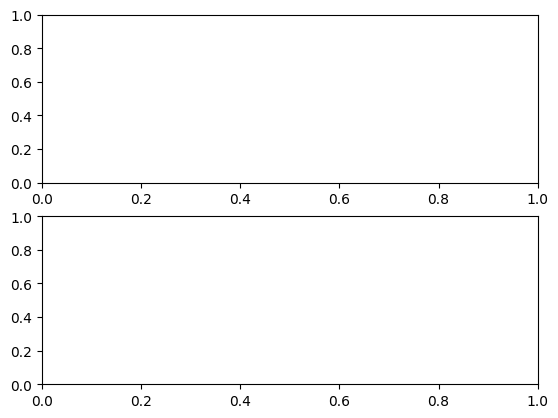

In [54]:
plt1, (plt2, plt3) = plt.subplots(2,1)
plt2.plot(history.history['accuracy'], c= 'blue')
plt2.plot(history.history['val_accuracy'], c='red')
plt2.set_title('model accuracy')
plt2.set_ylabel('accuracy')
plt2.set_xlabel('epoch')
plt2.legend(['CNN_train', 'CNN_val'], loc='upper left')

plt3.plot(history.history['loss'], c='blue')
plt3.plot(history.history['val_loss'], c='red')
plt3.set_title('model loss')
plt3.set_ylabel('loss')
plt3.set_xlabel('epoch')

In [87]:
def decode_labels(score):
    return "Positive" if score > 0.5 else "Negative"


scores = model.predict(X_test, verbose=1, batch_size=10000)
y_pred = [decode_labels(score) for score in scores]

NameError: name 'model' is not defined

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

#Get the confusion matrix
cf_matrix = confusion_matrix(test_data.label.to_list(), y_pred)
print(cf_matrix)


#sns.heatmap(cf_matrix, annot=True)
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

NameError: name 'y_pred' is not defined

In [64]:
print(classification_report(list(test_data.label), y_pred))

NameError: name 'y_pred' is not defined

In [65]:
sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(32, 5, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model2 = tf.keras.Model(sequence_input, outputs)


model2.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1, min_lr = 0.01, monitor = 'val_loss', verbose = 1)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

NameError: name 'Input' is not defined

In [84]:
history2 = model2.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

NameError: name 'model2' is not defined

In [85]:
model2.save('../models/cnn_model2.h5')

NameError: name 'model2' is not defined

In [86]:
load_model2 = tf.keras.models.load_model('../models/cnn_model2.h5')

# Check its architecture
load_model2.summary()

NameError: name 'tf' is not defined

NameError: name 'history2' is not defined

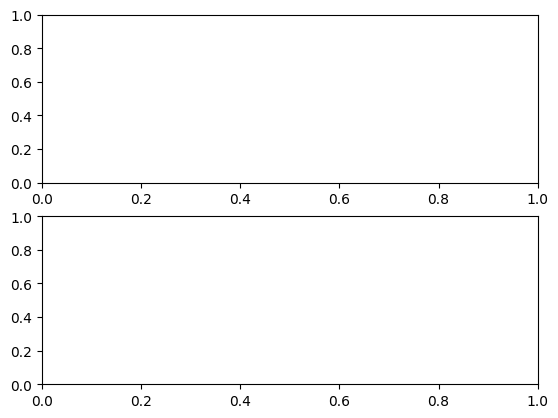

In [83]:
plt1, (plt2, plt3) = plt.subplots(2,1)
plt2.plot(history2.history['accuracy'], c= 'blue')
plt2.plot(history2.history['val_accuracy'], c='red')
plt2.set_title('model accuracy')
plt2.set_ylabel('accuracy')
plt2.set_xlabel('epoch')
plt2.legend(['CNN_train', 'CNN_val'], loc='upper left')

plt3.plot(history2.history['loss'], c='blue')
plt3.plot(history2.history['val_loss'], c='red')
plt3.set_title('model loss')
plt3.set_ylabel('loss')
plt3.set_xlabel('epoch')

In [82]:
def decode_labels(score):
    return "Positive" if score > 0.5 else "Negative"


scores = model2.predict(X_test, verbose=1, batch_size=10000)
y_pred = [decode_labels(score) for score in scores]

NameError: name 'model2' is not defined

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

#Get the confusion matrix
cf_matrix = confusion_matrix(test_data.label.to_list(), y_pred)
print(cf_matrix)


#sns.heatmap(cf_matrix, annot=True)
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

NameError: name 'y_pred' is not defined

In [80]:
print(classification_report(list(test_data.label), y_pred))

NameError: name 'y_pred' is not defined

In [79]:
from sklearn.metrics import roc_curve
y_pred_cnn1 = load_model.predict(X_test).ravel()
fpr_cnn1, tpr_cnn1, thresholds_cnn1 = roc_curve(y_test, y_pred_cnn1)
y_pred_cnn2 = load_model2.predict(X_test).ravel()
fpr_cnn2, tpr_cnn2, thresholds_cnn2 = roc_curve(y_test, y_pred_cnn2)

NameError: name 'load_model' is not defined

In [78]:
#AUC calculation
from sklearn.metrics import auc
auc_cnn1 = auc(fpr_cnn1, tpr_cnn1)
auc_cnn2 = auc(fpr_cnn2, tpr_cnn2)

NameError: name 'fpr_cnn1' is not defined

NameError: name 'fpr_cnn1' is not defined

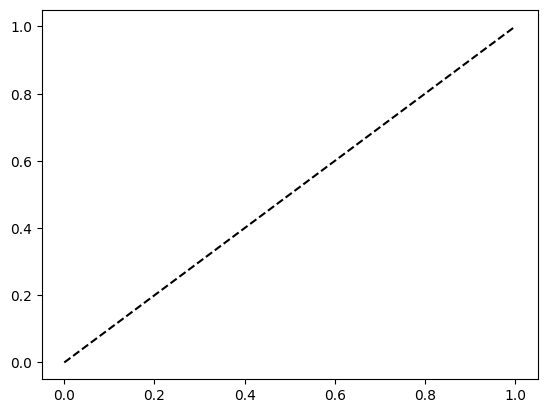

In [77]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn1, tpr_cnn1, label='CNN-1 (AUC-area-1 = {:.3f})'.format(auc_cnn1))
plt.plot(fpr_cnn2, tpr_cnn2, label='CNN-2 (AUC-area-1 = {:.3f})'.format(auc_cnn2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [68]:
from scipy.stats import entropy
from math import log, e
def entropy(labels, base=None):
    """ Computes entropy of label distribution. """

    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)

    return ent

In [69]:
ent_df = entropy(df)

In [70]:
ent_df

5.500532155642244

In [72]:
df_f = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, encoding='latin')
df_f.columns = ['label', 'id', 'date', 'query', 'user', 'tweet']

In [73]:
# Data reduction
df_f =  df_f.drop(['id'], axis=1)

In [74]:
labels_dict = {0:'Negative', 2:'Neutral', 4:'Positive'}

def convert_labels(label):
    return labels_dict[label]

df_f.label = df_f.label.apply(lambda x: convert_labels(x))

In [75]:
ent_df_first = entropy(df_f)
ent_df_first

15.016529003105866